## PRIMER ANÁLISIS CON TIO

### Gráfica de reflectancia

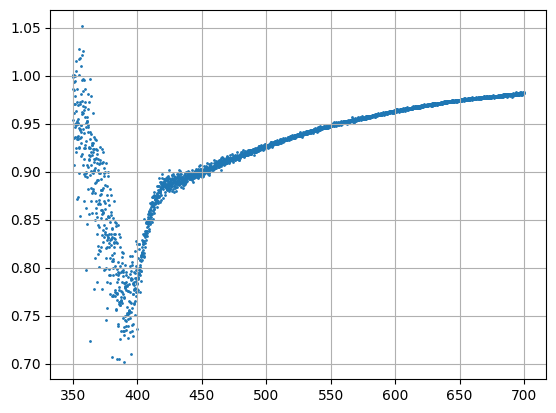

In [2]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("ref_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("muestra_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()



### Uso de Kubelka-Munk

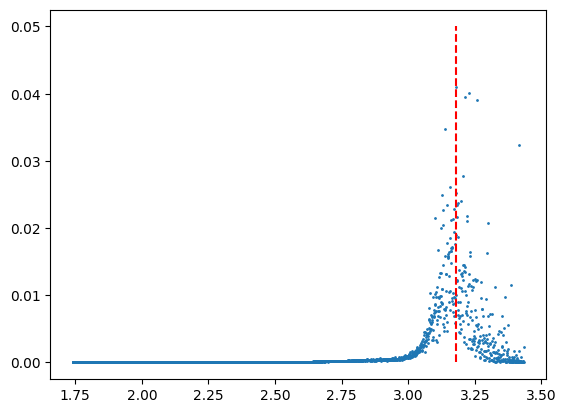

In [3]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)



y0 = (F[mask]* x[mask]  )**(1/n[0])
plt.scatter(x[mask],y0, s=1 )
plt.plot([x[mask][np.where(y0 == np.max(y0))[0][0]], x[mask][np.where(y0 == np.max(y0))[0][0]]], [0, 0.05], "r--")
plt.show()

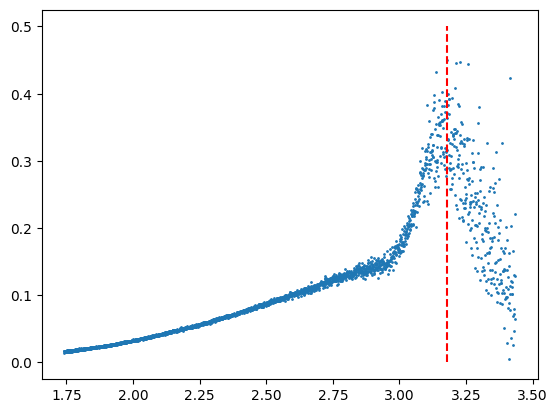

In [4]:
y1 = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y1, s=1 )
plt.plot([x[mask][np.where(y1 == np.max(y1))[0][0]], x[mask][np.where(y1 == np.max(y1))[0][0]]], [0, 0.5], "r--")
plt.show()

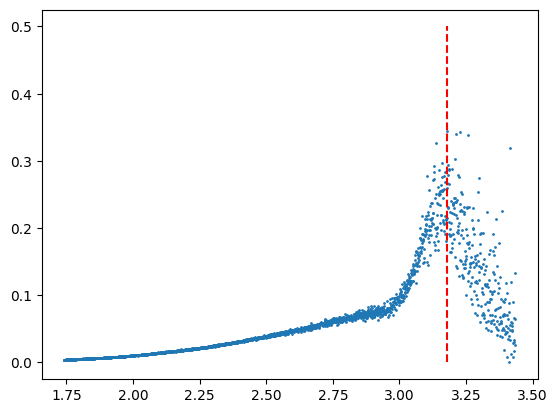

In [5]:
y2 = (F[mask]* x[mask]  )**(1/n[2])
plt.scatter(x[mask],y2, s=1 )
plt.plot([x[mask][np.where(y2 == np.max(y2))[0][0]], x[mask][np.where(y2 == np.max(y2))[0][0]]], [0, 0.5], "r--")
plt.show()

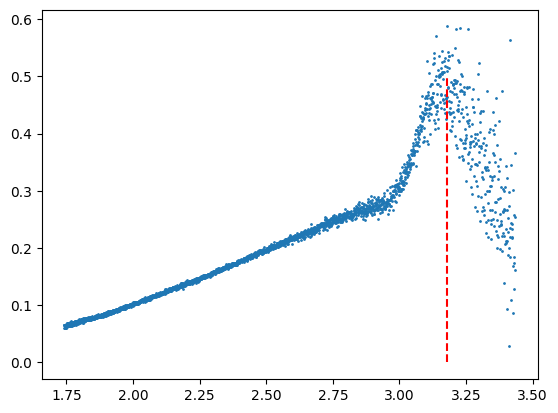

In [6]:
y3 = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y3, s=1 )
plt.plot([x[mask][np.where(y3 == np.max(y3))[0][0]], x[mask][np.where(y3 == np.max(y3))[0][0]]], [0, 0.5], "r--")
plt.show()

### REGRESIÓN LINEAL

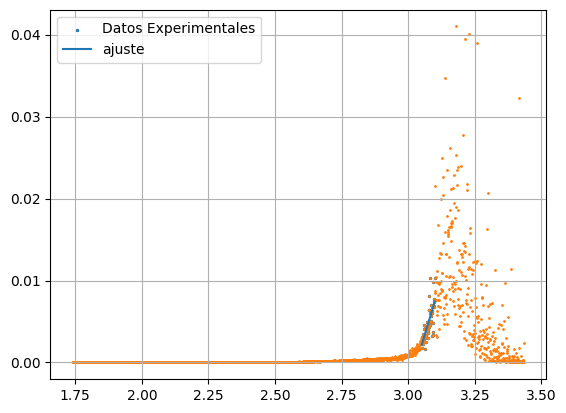

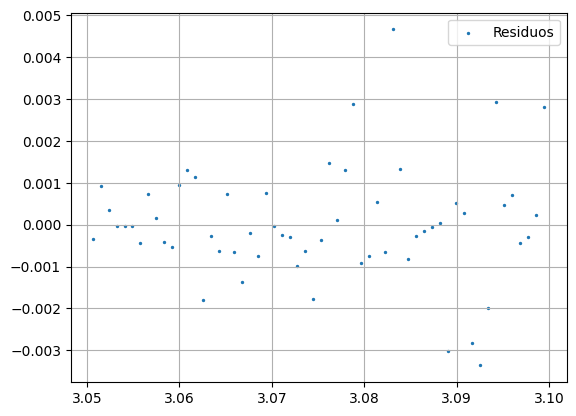

-3.0309749424474974 0.5662165402680857


In [7]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y0 == np.max(y0))[0][0]]

mask_lin = (x>3.05) & (x<3.10) 

x_lin0 = x[mask_lin]
y_lin0 = (F[mask_lin]* x[mask_lin]  )**(2)


slope, intercept, r_value, p_value, std_err = linregress(x_lin0, y_lin0)

plt.scatter(x_lin0, y_lin0, s=2, label = 'Datos Experimentales')
plt.plot(x_lin0, slope*x_lin0 + intercept, label = 'ajuste')
plt.scatter(x[mask],y0, s=1 )
plt.legend()
plt.grid()
plt.show()
plt.scatter(x_lin0, y_lin0- (slope*x_lin0 + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope), r_value**2)



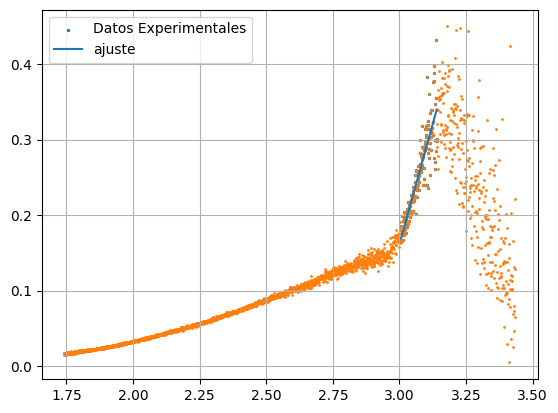

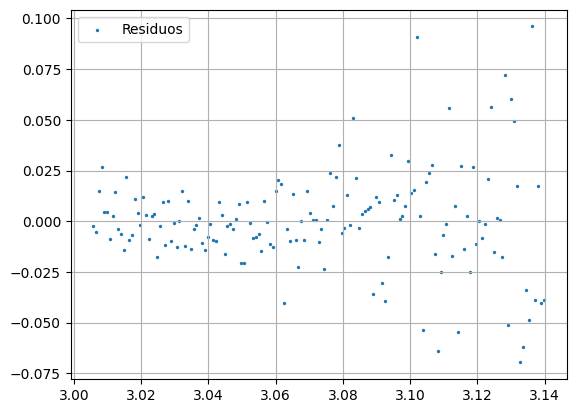

-2.8731046739875983 0.8024052483804747


In [8]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y1 == np.max(y1))[0][0]]

mask_lin = (x>3.005) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)


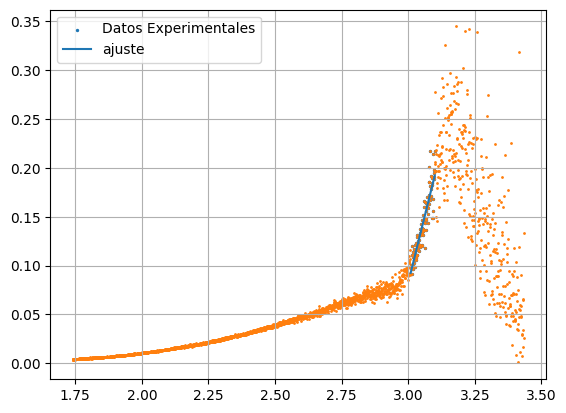

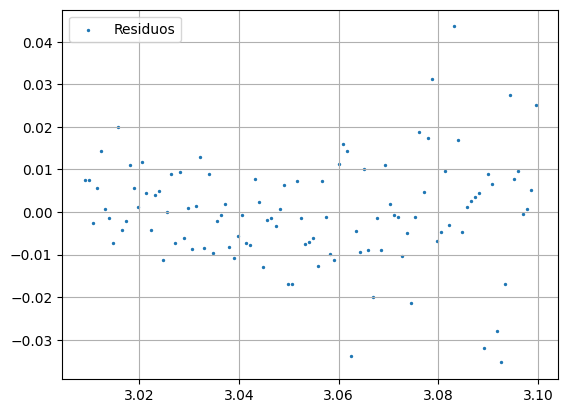

-2.9251334247054106 0.8487241209959074


In [9]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y2 == np.max(y2))[0][0]]

mask_lin = (x>3.009) & (x<3.10) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[2])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y2, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

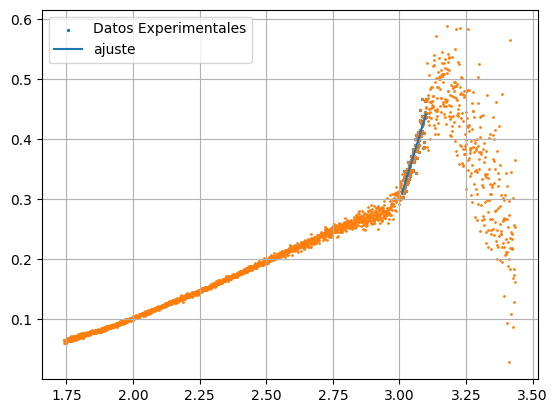

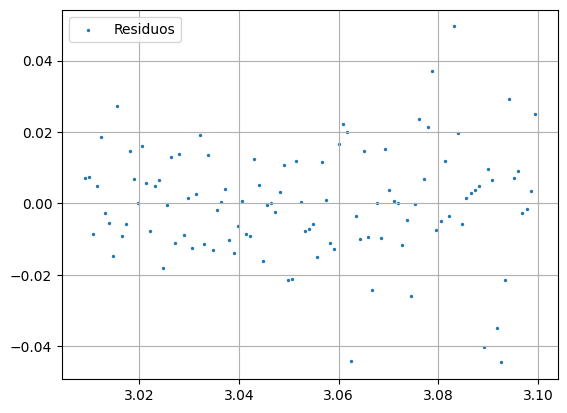

-2.7971554412178325 0.8637071903850284


In [11]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y3 == np.max(y3))[0][0]]

mask_lin = (x>3.009) & (x<3.10) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[3])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y3, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

## SEGUNDO ANÁLISIS CON TIO

### Gráfica de reflectancia

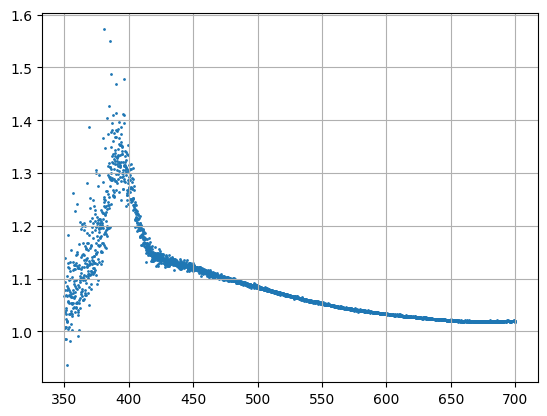

In [12]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("ref_tio_1.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("muestra_tio_1.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()



### Uso de Kubelka-Munk

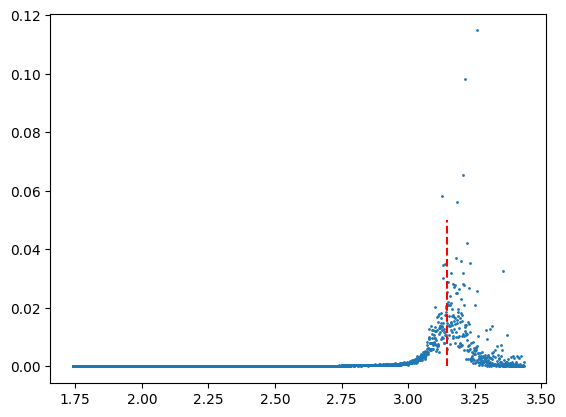

In [13]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = ((1-reflectancia)**2) / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y0 = (F[mask]* x[mask]  )**(1/n[0])
plt.scatter(x[mask],y0, s=1 )
plt.plot([3.145, 3.145], [0, 0.05], "r--")
plt.show()

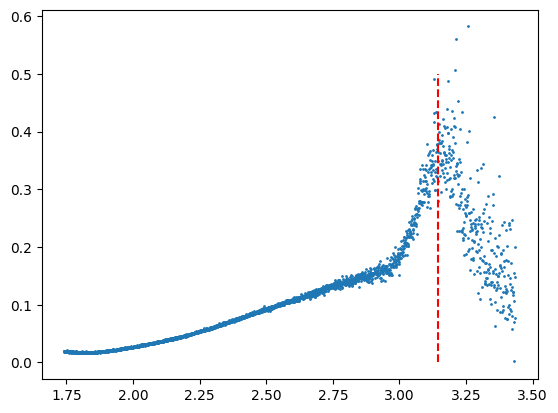

In [14]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y1 = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y1, s=1 )
plt.plot([3.145, 3.145], [0, 0.5], "r--")
plt.show()

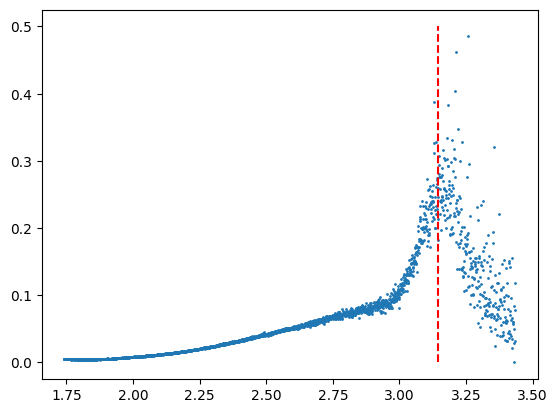

In [15]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y2 = (F[mask]* x[mask]  )**(1/n[2])
plt.scatter(x[mask],y2, s=1 )
plt.plot([3.145, 3.145], [0, 0.5], "r--")
plt.show()

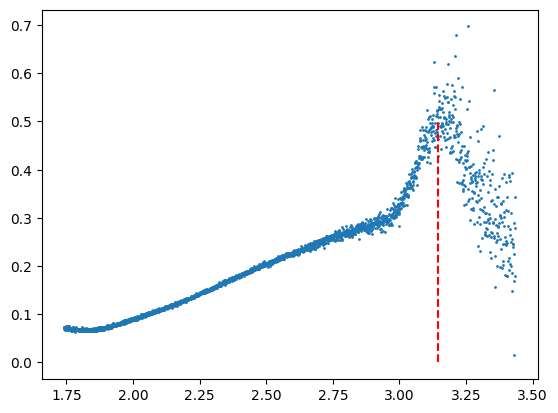

In [16]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y3 = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y3, s=1 )
plt.plot([3.145, 3.145], [0, 0.5], "r--")
plt.show()

### Regresión lineal

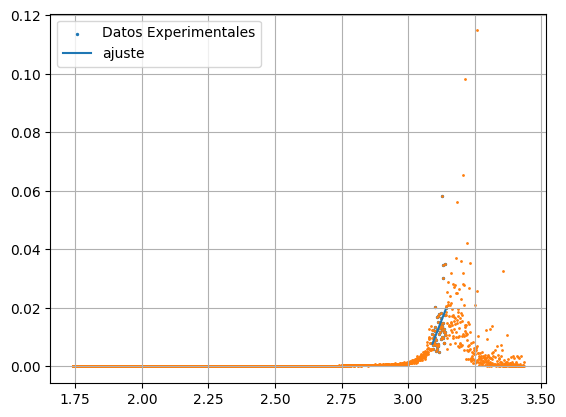

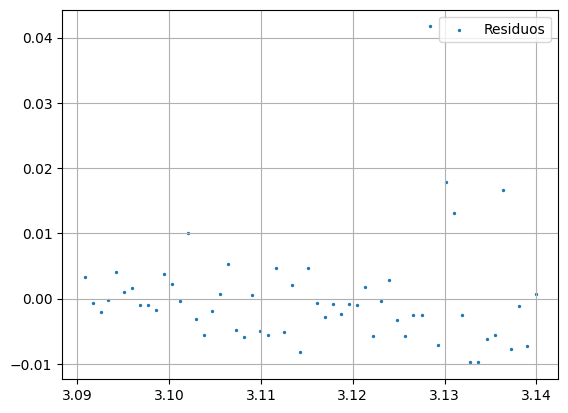

-3.057975836334778 0.15665222993343572


In [17]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y0 == np.max(y0))[0][0]]

mask_lin = (x>3.09) & (x<3.14) 

x_lin0 = x[mask_lin]
y_lin0 = (F[mask_lin]* x[mask_lin]  )**(1/n[0])


slope, intercept, r_value, p_value, std_err = linregress(x_lin0, y_lin0)

plt.scatter(x_lin0, y_lin0, s=2, label = 'Datos Experimentales')
plt.plot(x_lin0, slope*x_lin0 + intercept, label = 'ajuste')
plt.scatter(x[mask],y0, s=1 )
plt.legend()
plt.grid()
plt.show()
plt.scatter(x_lin0, y_lin0- (slope*x_lin0 + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope), r_value**2)

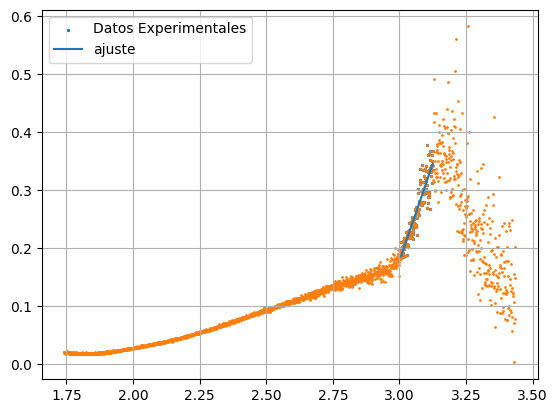

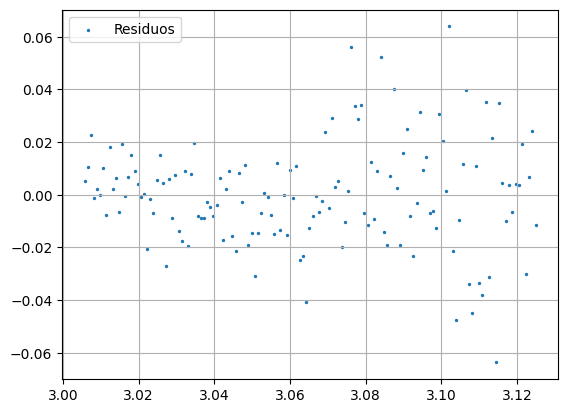

-2.8679176179677985 0.8454515106898665
0.1492436659148032


In [18]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y1 == np.max(y1))[0][0]]

mask_lin = (x>3.005) & (x<3.125) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)
print(linregress(x_lin, y_lin).intercept_stderr)

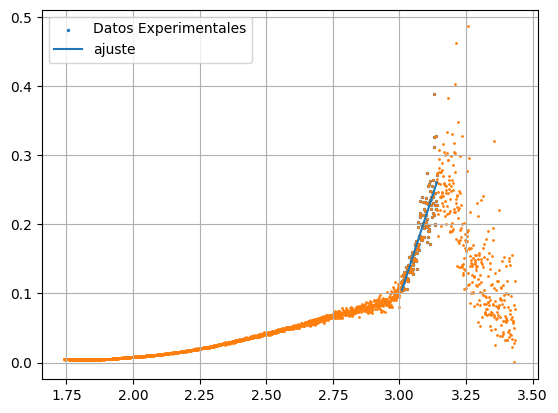

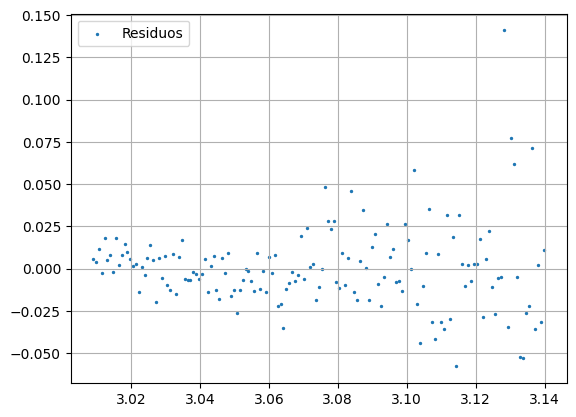

-2.9208888300564686 0.7787853231246967


In [19]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y2 == np.max(y2))[0][0]]

mask_lin = (x>3.009) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[2])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y2, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

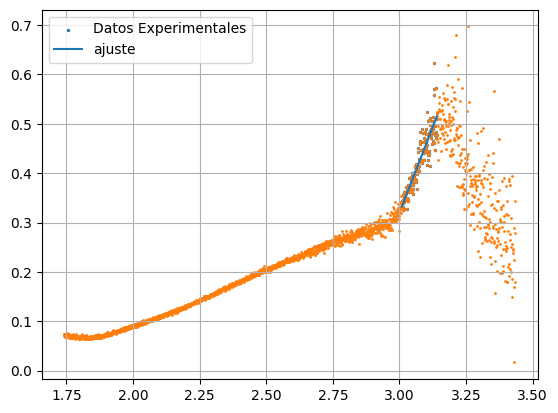

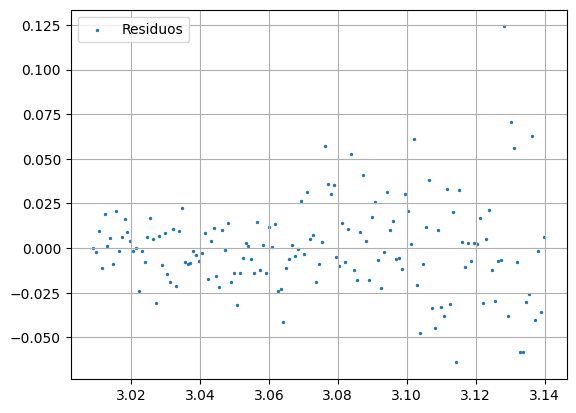

-2.7708609706544647 0.8169304522812918


In [20]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y3 == np.max(y3))[0][0]]

mask_lin = (x>3.009) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[3])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y3, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

## ANÁLISIS CON ZnO

### Gráfica de reflectancia

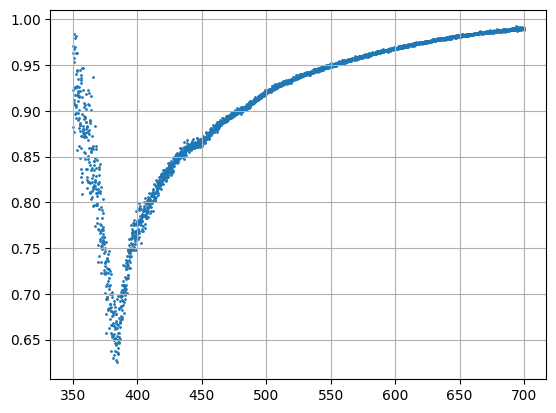

In [21]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("ref_zio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("muestra_zio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark_zio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()

### Uso de Kubelka-Munk

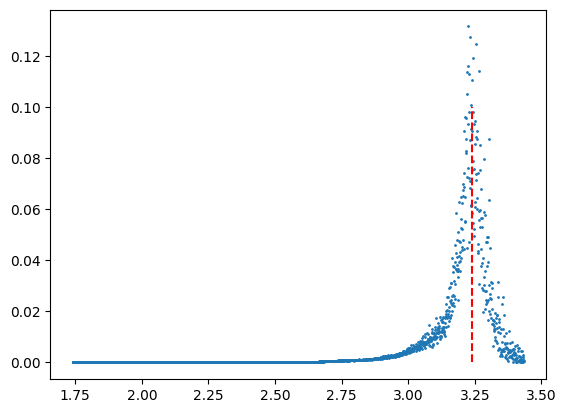

In [22]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y0 = (F[mask]* x[mask]  )**(1/n[0])
plt.scatter(x[mask],y0, s=1 )
plt.plot([3.24, 3.24], [0, 0.1], "r--")
plt.show()

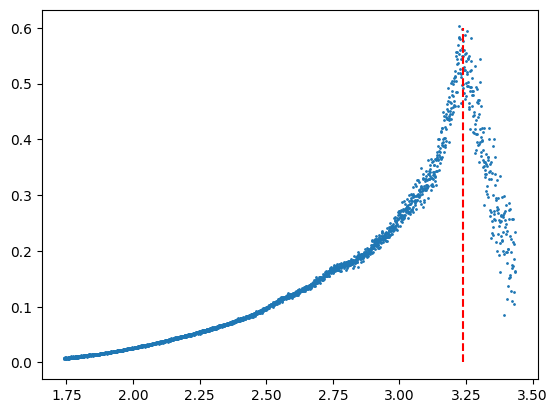

In [23]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y1 = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y1, s=1 )
plt.plot([3.24, 3.24], [0, 0.6], "r--")
plt.show()

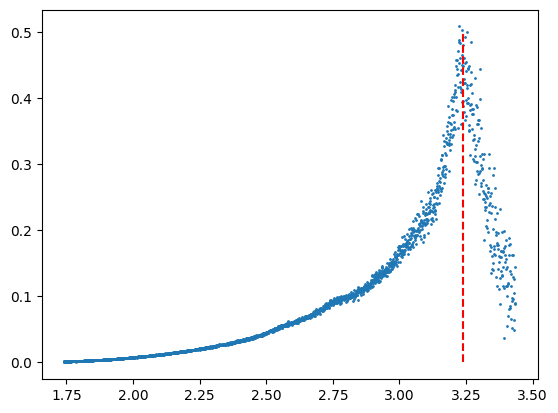

In [24]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y2 = (F[mask]* x[mask]  )**(1/n[2])
plt.scatter(x[mask],y2, s=1 )
plt.plot([3.24, 3.24], [0, 0.5], "r--")
plt.show()

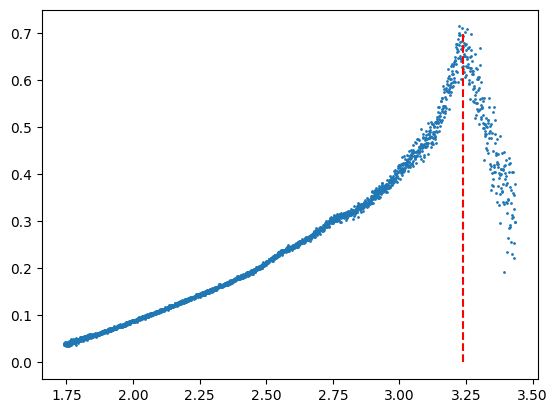

In [25]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y3 = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y3, s=1 )
plt.plot([3.24, 3.24], [0, 0.7], "r--")
plt.show()

### Regresión lineal

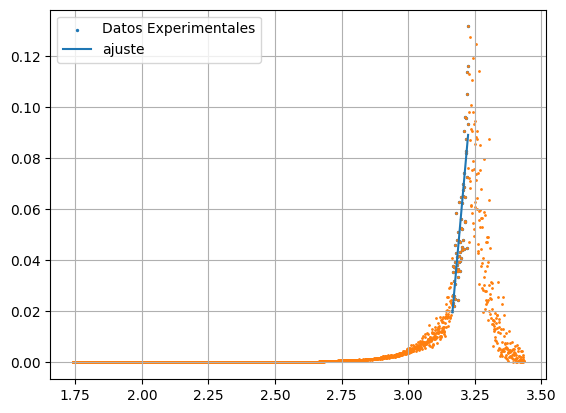

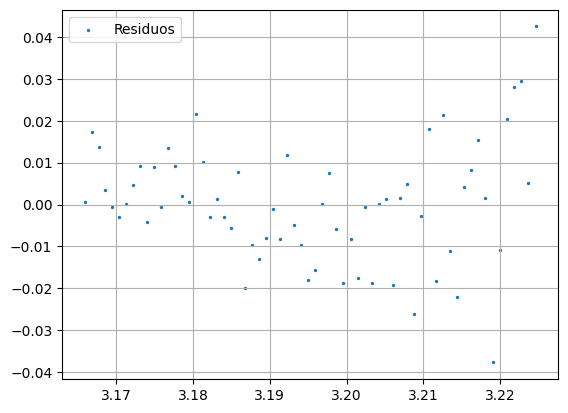

-3.1492499196342 0.6749447451261219


In [26]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y0 == np.max(y0))[0][0]]

mask_lin = (x>3.165) & (x<3.225) 

x_lin0 = x[mask_lin]
y_lin0 = (F[mask_lin]* x[mask_lin]  )**(1/n[0])


slope, intercept, r_value, p_value, std_err = linregress(x_lin0, y_lin0)

plt.scatter(x_lin0, y_lin0, s=2, label = 'Datos Experimentales')
plt.plot(x_lin0, slope*x_lin0 + intercept, label = 'ajuste')
plt.scatter(x[mask],y0, s=1 )
plt.legend()
plt.grid()
plt.show()
plt.scatter(x_lin0, y_lin0- (slope*x_lin0 + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope), r_value**2)


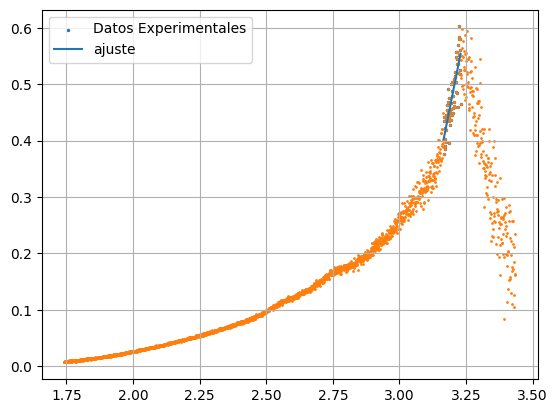

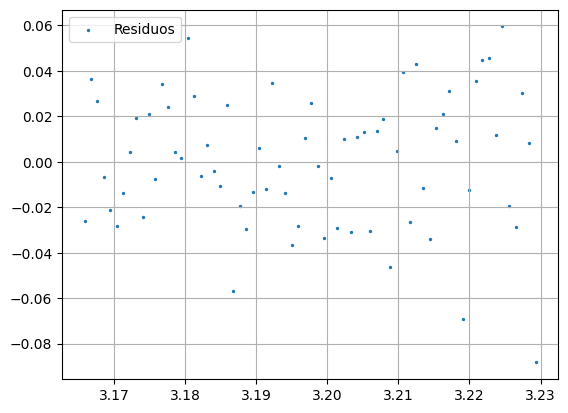

-2.9968084995019613 0.6984821466112492


In [27]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y1 == np.max(y1))[0][0]]

mask_lin = (x>3.165) & (x<3.23) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

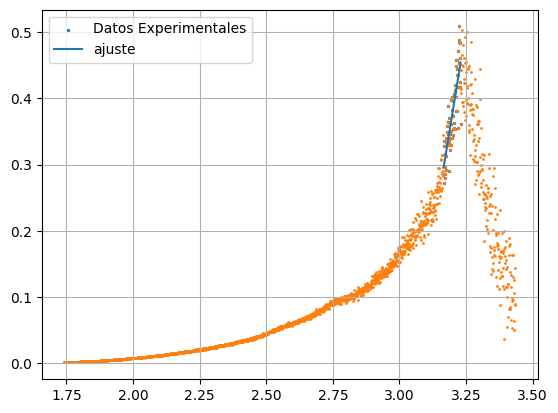

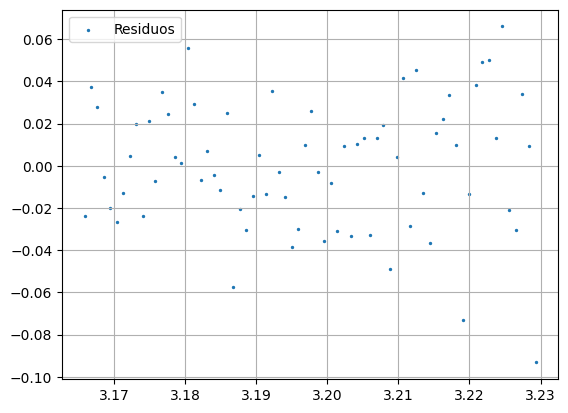

-3.0470654060633886 0.6953041747310876


In [28]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y2 == np.max(y2))[0][0]]

mask_lin = (x>3.165) & (x<3.23) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[2])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y2, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

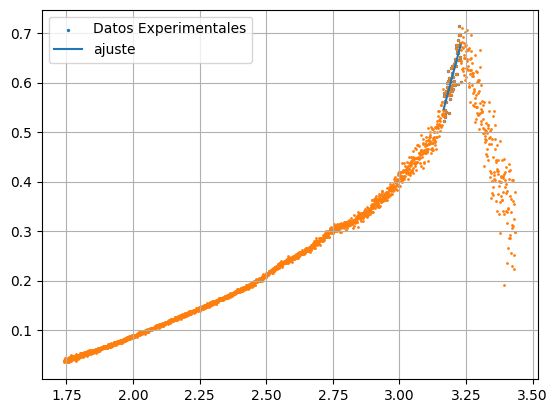

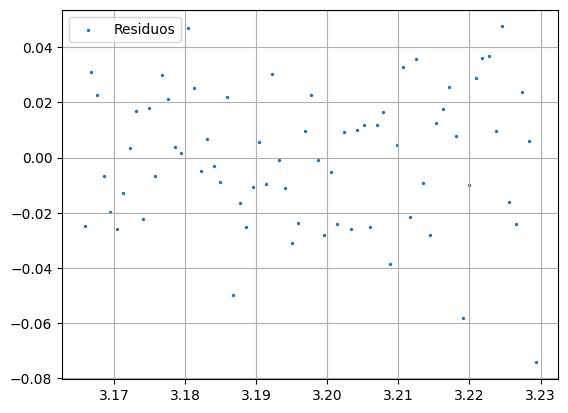

-2.8961865642274316 0.7009958735343631


In [29]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y3 == np.max(y3))[0][0]]

mask_lin = (x>3.165) & (x<3.23) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[3])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y3, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

## Gráficas artículo

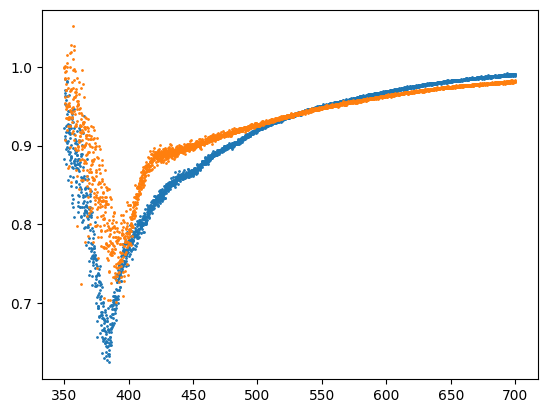

In [30]:
import pandas as pd
import numpy as np



df_referenciaz = pd.read_csv("ref_zio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestraz = pd.read_csv("muestra_zio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_darkz = pd.read_csv("dark_zio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])


df_referenciat = pd.read_csv("ref_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestrat = pd.read_csv("muestra_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_darkt = pd.read_csv("dark_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referenciaz.iloc[:-1,0].values, dtype=float)
radiancia_referenciaz = df_referenciaz.iloc[:-1,1].values
radiancia_muestraz = df_muestraz.iloc[:-1,1].values
radiancia_darkz = df_darkz.iloc[:-1,1].values


reflectanciaz = np.array(  (radiancia_muestraz - radiancia_darkz) / (radiancia_referenciaz - radiancia_darkz))



mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectanciaz[mask], s=1)
plt.grid()

radiancia_referenciat = df_referenciat.iloc[:-1,1].values
radiancia_muestrat = df_muestrat.iloc[:-1,1].values
radiancia_darkt = df_darkt.iloc[:-1,1].values


reflectanciat = (np.array(  (radiancia_muestrat - radiancia_darkt) / (radiancia_referenciat - radiancia_darkt)))

plt.scatter(longitud_onda[mask], reflectanciat[mask], s=1)
plt.grid()
plt.show()

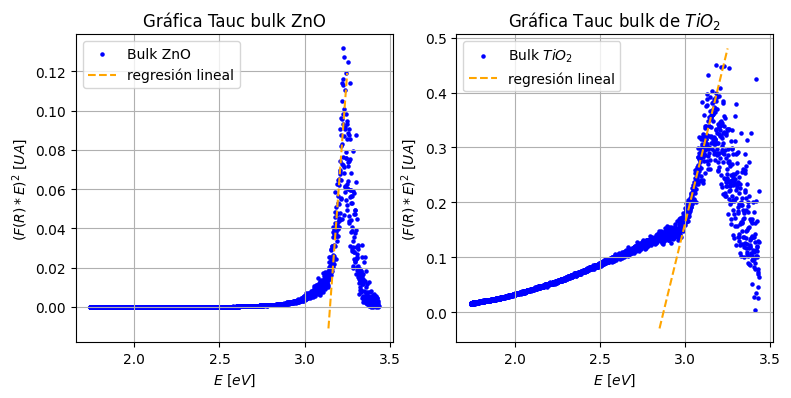

[np.float64(-3.1492499196342), np.float64(-2.8731046739875983)]
[np.float64(-0.3922476348568595), np.float64(-0.1671205371588691)]


In [37]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)

mask_lin1 = (x>3.165) & (x<3.225) 
Fz = ((1-reflectanciaz)**2) / (2*reflectanciaz)
Fz = np.flip(Fz)
pz = 1/2
yz = (Fz[mask]* x[mask]  )**(1/pz)
x_lin1 = x[mask_lin1]
y_lin1 = (Fz[mask_lin1]* x[mask_lin1]  )**(1/pz)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_lin1, y_lin1)



Ft = ((1-reflectanciat)**2) / (2*reflectanciat)
Ft = np.flip(Ft)
pt = 2
yt = (Ft[mask]* x[mask]  )**(1/pt)  
mask_lin2 = (x>3.005) & (x<3.14)
x_lin2 = x[mask_lin2]
y_lin2 = (Ft[mask_lin2]* x[mask_lin2]  )**(1/pt)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x_lin2, y_lin2)


fig,ax = plt.subplots(1,2, figsize=(9,4))
ax[0].scatter(x[mask],yz, s=5, marker ='o', color = 'blue', label = r'Bulk ZnO' ) 
ax[0].plot(np.linspace(3.14, 3.25, 100), np.linspace(3.14, 3.25, 100)*slope1 +intercept1, '--', color = 'orange', label = f'regresión lineal' )
ax[0].set_title('Gráfica Tauc bulk ZnO')
ax[0].set_xlabel(r'$E$ $[eV]$')
ax[0].set_ylabel(r'$(F(R)*E)^2$ $[UA]$')
ax[0].grid()
ax[0].legend()

ax[1].scatter(x[mask],yt,  s=5, marker ='o', color = 'blue', label = r'Bulk $TiO_2$' ) 
ax[1].plot(np.linspace(2.85, 3.25, 100), np.linspace(2.85, 3.25, 100)*slope2 +intercept2, '--', color = 'orange', label = f'regresión lineal' )
ax[1].set_title(r'Gráfica Tauc bulk de $TiO_2$')
ax[1].set_xlabel(r'$E$ $[eV]$')
ax[1].set_ylabel(r'$(F(R)*E)^2$ $[UA]$')
ax[1].grid()
ax[1].legend()

plt.show()

print([intercept1/slope1, intercept2/slope2])
print([(intercept1/slope1)*np.sqrt((0.330504523445012/intercept1)**2 + (std_err1/slope1)**2), (intercept2/slope2) * np.sqrt((0.15555590521490345/intercept2)**2 + (std_err2/slope2)**2)])

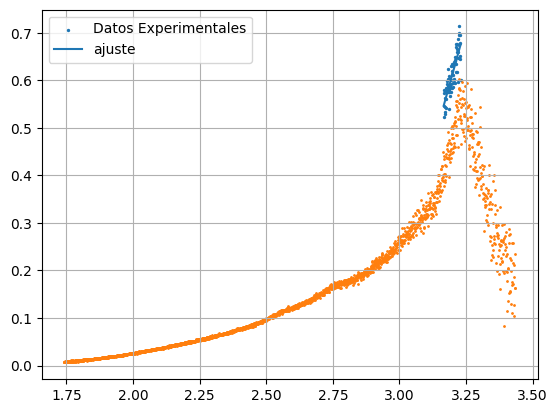

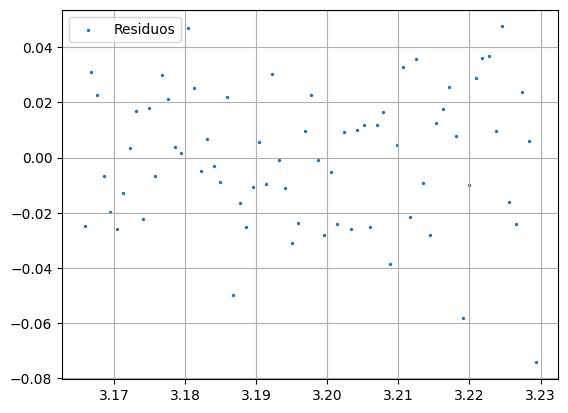

-2.8961865642274316 0.7009958735343631
0.5132861488637404


In [31]:
from scipy.stats import linregress
from scipy.constants import h, e



mask_linz = (x>3.005) & (x<3.125) 
x_linz = x[mask_lin]
y_linz = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
x_maxz = x[mask][np.where(y1 == np.max(y1))[0][0]]
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)
print(linregress(x_lin, y_lin).intercept_stderr)